In [56]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [57]:
# Load the dataset
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df.shape

(858, 36)

In [58]:
# Print the first 2 rows for a sanity check
print("First 2 rows of the dataset:")
print(df.head(2))

# Get a concise summary of the dataframe
print("\nDataset Info:")
df.info()

First 2 rows of the dataset:
   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0 

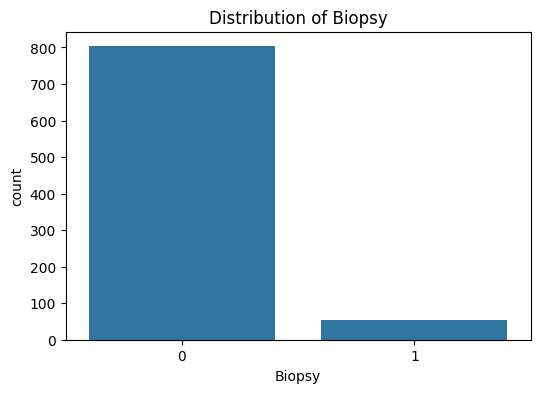

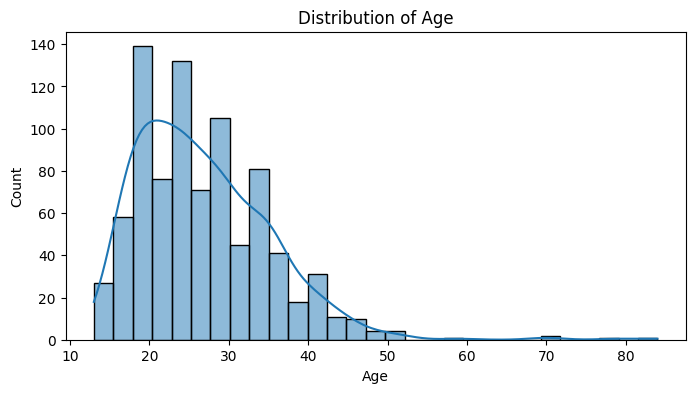

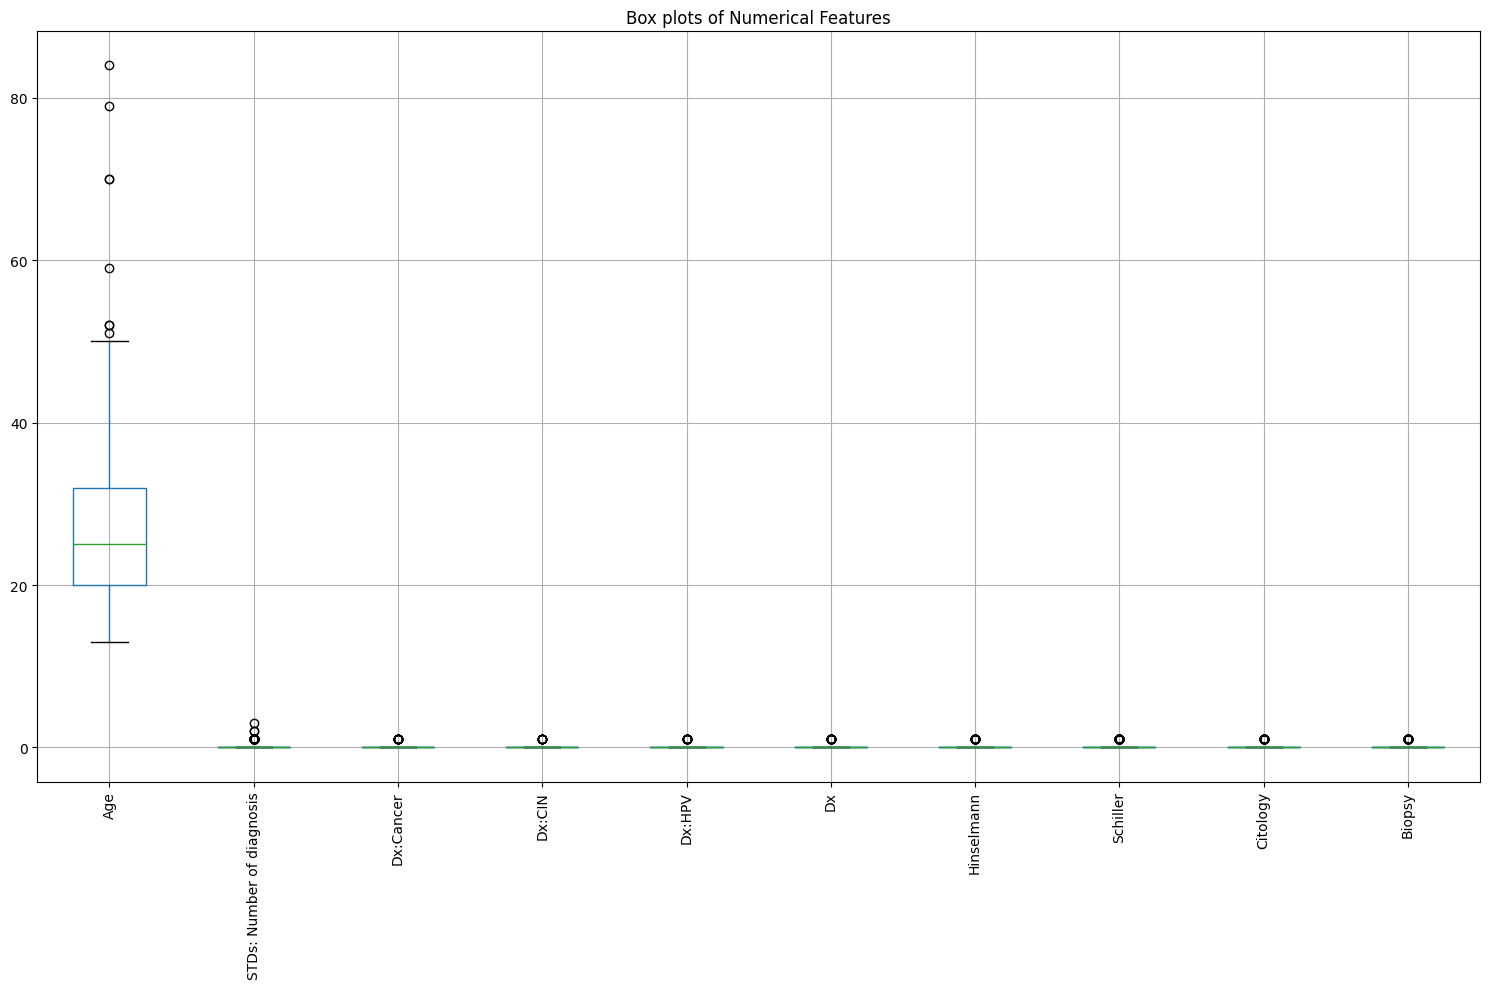

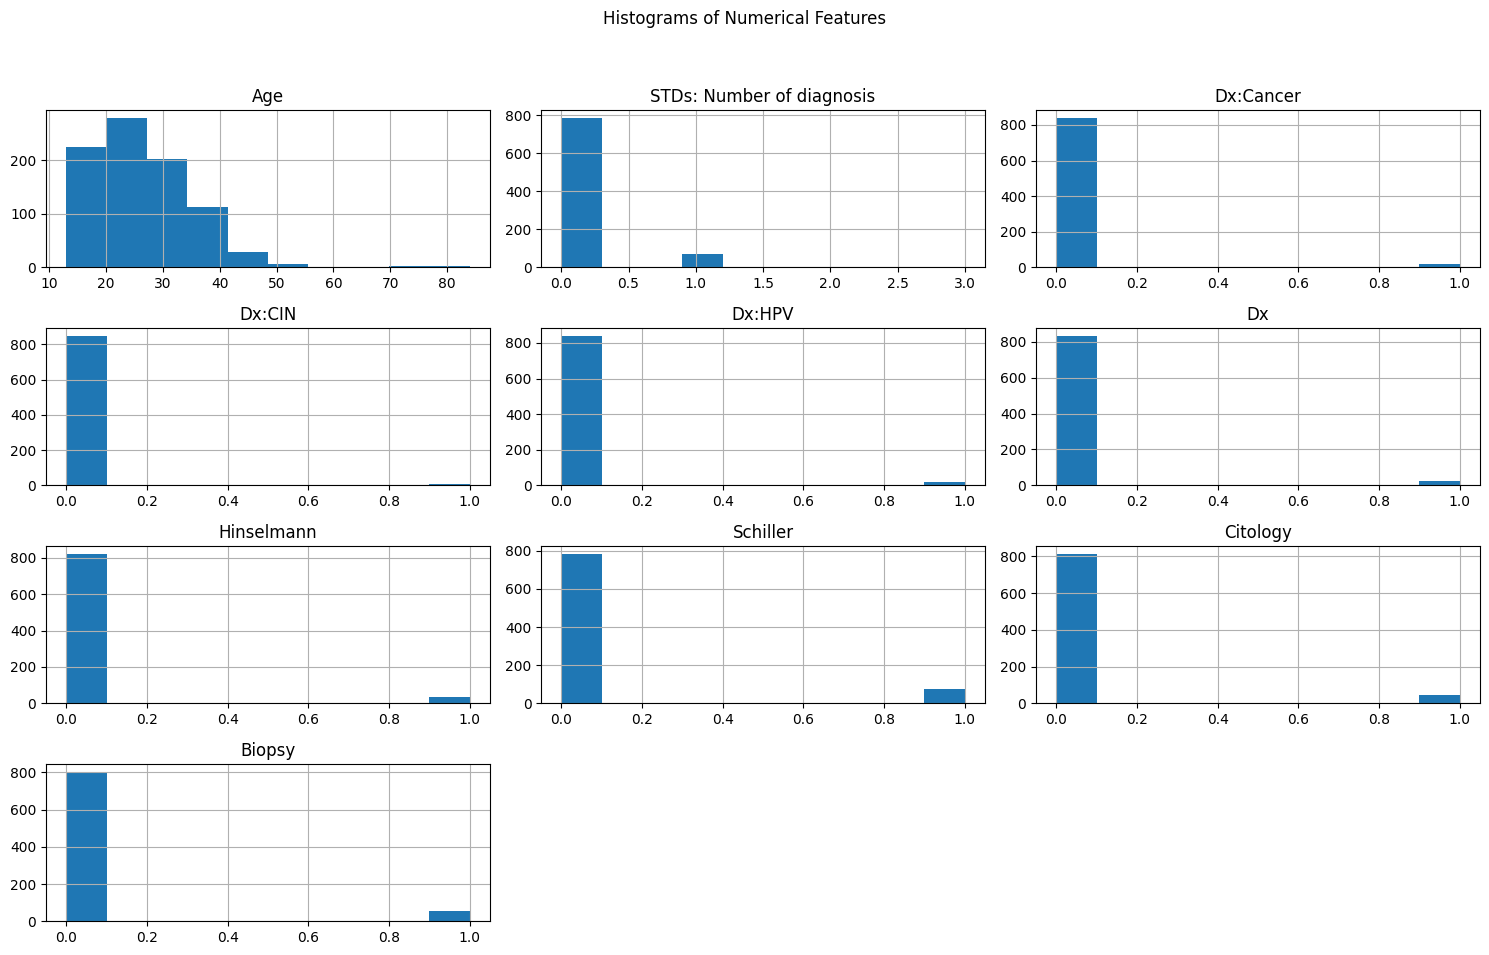

In [59]:
# Provide appropriate data visualizations to get an insight about the dataset.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribution of the target variable 'Biopsy'
plt.figure(figsize=(6, 4))
sns.countplot(x='Biopsy', data=df)
plt.title('Distribution of Biopsy')
plt.show()

# Distribution of 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Box plot of numerical features to visualize distributions and potential outliers (after imputation and capping)
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.title('Box plots of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histograms of numerical features to check for skewness (after transformations)
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [60]:
import numpy as np

# Identify columns with non-numeric data types
object_cols = df.select_dtypes(include='object').columns

# Replace '?' with NaN and convert to numeric, coercing errors
for col in object_cols:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify data types and check for remaining null values
display(df.info())
display(df.isnull().sum())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

None

,0
Age,0
Number of sexual partners,26
First sexual intercourse,7
Num of pregnancies,56
Smokes,13
Smokes (years),13
Smokes (packs/year),13
Hormonal Contraceptives,108
Hormonal Contraceptives (years),108
IUD,117


(858, 36)

In [61]:
# Impute missing numerical values with the mean
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())

# Verify that there are no more missing values
display(df.isnull().sum())

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


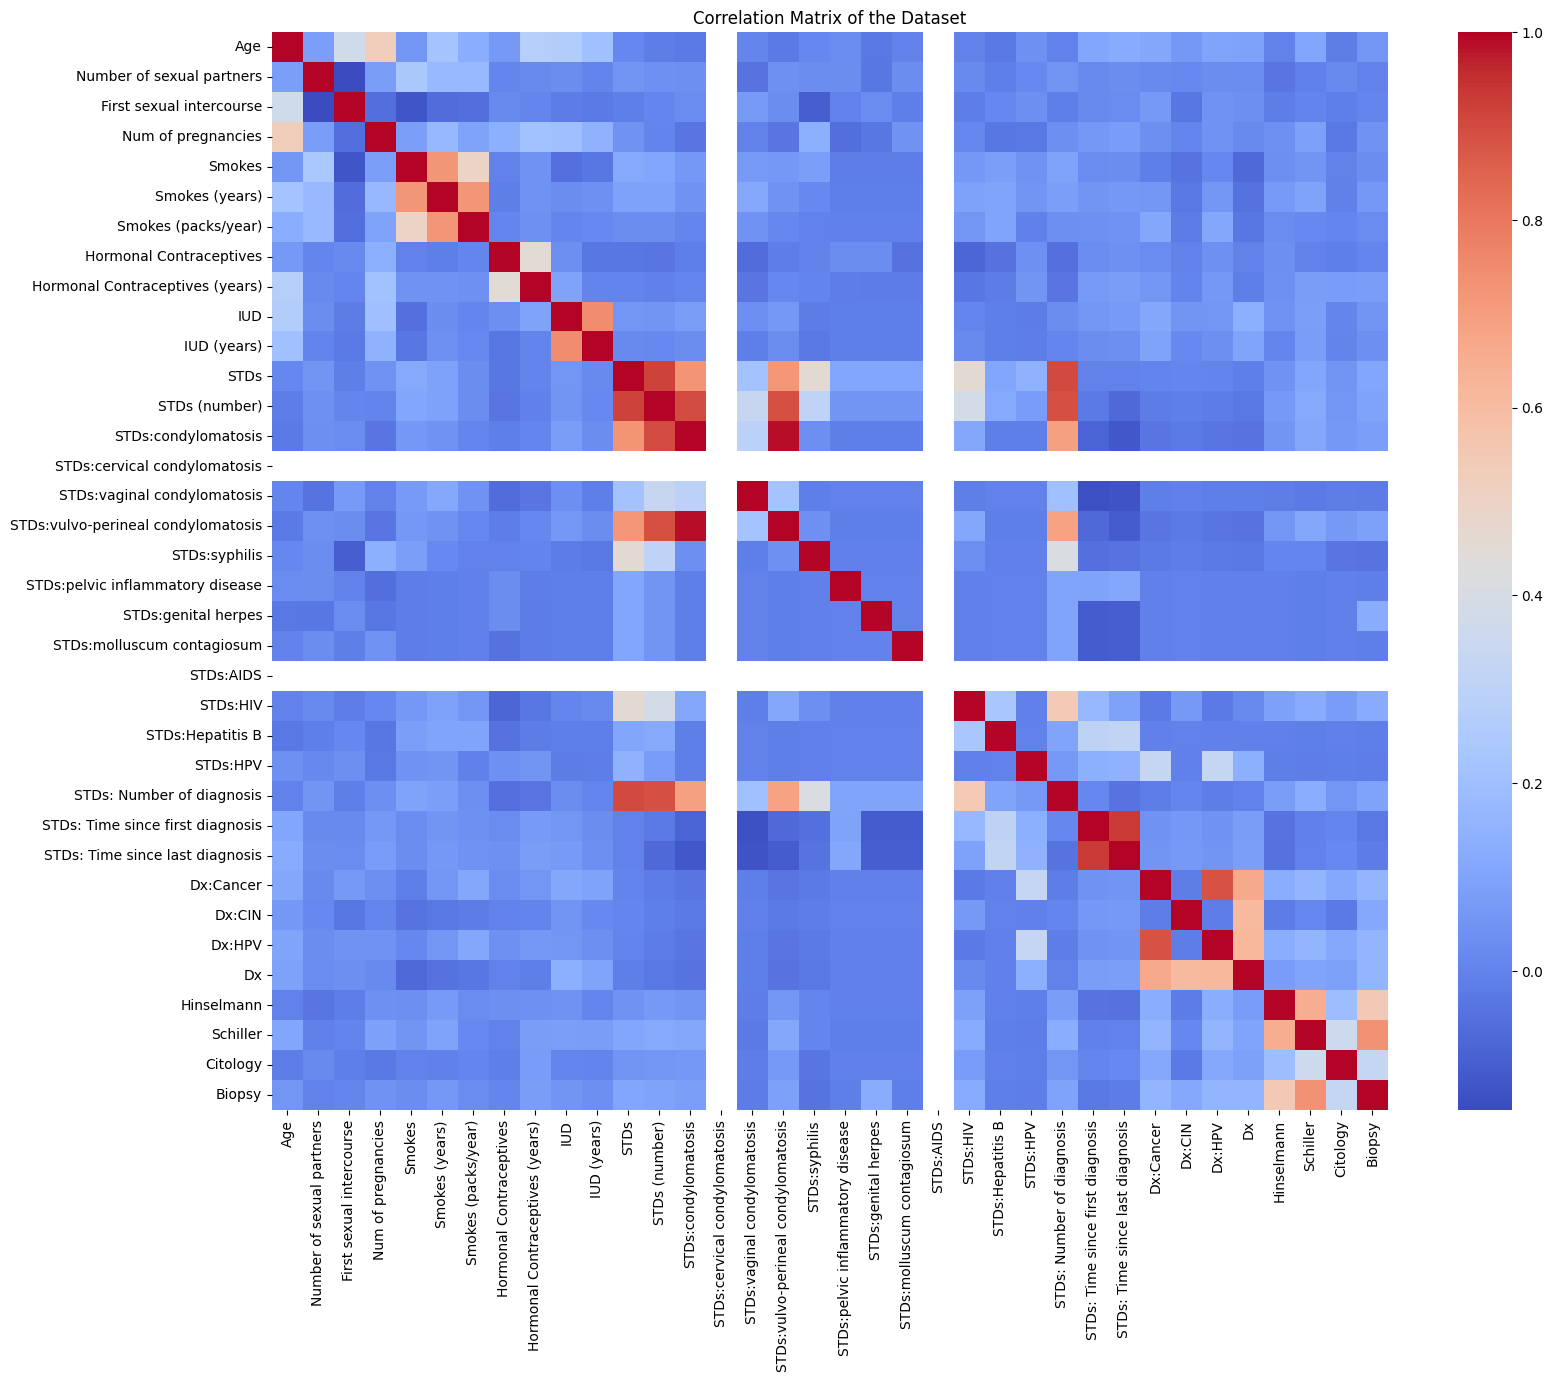

(858, 36)

In [62]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of the Dataset')
plt.show()
df.shape

In [63]:
#sample display of data after replacing values with mean data
df.head(12)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,6.140845,5.816901,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,6.140845,5.816901,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,6.140845,5.816901,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.000000,1.0,37.000000,37.0,1.0,3.0,0.000000,...,6.140845,5.816901,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.000000,0.0,0.000000,0.0,1.0,15.0,0.000000,...,6.140845,5.816901,0,0,0,0,0,0,0,0
5,42,3.0,23.0000,2.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,6.140845,5.816901,0,0,0,0,0,0,0,0
6,51,3.0,17.0000,6.000000,1.0,34.000000,3.4,0.0,0.0,1.000000,...,6.140845,5.816901,0,0,0,0,1,1,0,1
7,26,1.0,26.0000,3.000000,0.0,0.000000,0.0,1.0,2.0,1.000000,...,6.140845,5.816901,0,0,0,0,0,0,0,0
8,45,1.0,20.0000,5.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,6.140845,5.816901,1,0,1,1,0,0,0,0
9,44,3.0,15.0000,2.275561,1.0,1.266973,2.8,0.0,0.0,0.112011,...,6.140845,5.816901,0,0,0,0,0,0,0,0


### Effect of Correlational Analysis on Feature Selection

Correlational analysis **can have a significant effect on feature selection**. Here's why:

*   **Identifying Highly Correlated Features:** The heatmap visually shows pairs or groups of features that are highly correlated with each other (either positively or negatively).
*   **Multicollinearity:** High correlation between independent variables (features) is known as multicollinearity. Multicollinearity can cause problems in some machine learning models, particularly linear models (like Linear Regression and Logistic Regression), because it makes it difficult for the model to determine the individual effect of each correlated feature on the target variable. This can lead to unstable model coefficients and reduced interpretability.
*   **Redundancy:** Highly correlated features often provide similar information to the model. Including multiple highly correlated features can be redundant and increase the complexity of the model without adding significant predictive power.
*   **Feature Selection Strategies:** Based on the correlation analysis, you can employ feature selection strategies to address multicollinearity and reduce redundancy:
    *   **Remove one of the highly correlated features:** If two features are very highly correlated, you might choose to keep only one of them. The choice of which one to keep can be based on domain knowledge, importance scores, or simply which one is easier to interpret.
    *   **Combine highly correlated features:** In some cases, you might create a new feature that is a combination (e.g., sum or average) of the highly correlated features.
    *   **Use dimensionality reduction techniques:** Techniques like Principal Component Analysis (PCA) can be used to create a smaller set of uncorrelated features from a larger set of correlated ones.

**Justification:**

Analyzing the correlation matrix helps us understand the relationships between features. By identifying highly correlated features, we can make informed decisions during feature selection to mitigate issues like multicollinearity and redundancy. This can lead to a simpler, more stable, and potentially better-performing model, especially for models sensitive to feature correlations. Ignoring high correlations can result in models that are difficult to interpret, less robust, and may not generalize well to new data.

## Data Preprocessing and Cleaning

### a. Preprocessing Steps Performed

Based on the initial exploration and analysis, the following preprocessing steps were performed on the dataset:

1.  **Handling Missing Values:**
    *   Identified missing values represented by '?' in several columns.
    *   Replaced '?' characters with `np.nan` to represent missing data.
    *   Imputed missing numerical values with the mean of their respective columns. This approach was chosen over dropping rows as dropping resulted in significant data loss, making imputation a more suitable strategy to retain as much data as possible for model training.

2.  **Handling Outliers:**
    *   Visualized potential outliers in numerical features using box plots.
    *   Handled outliers in the 'Age' column by capping the values at the 95th percentile. Capping was chosen to limit the influence of extreme values without removing data points, which is beneficial for preserving the dataset's size.

3.  **Addressing Skewed Data:**
    *   Visualized the distribution of numerical features using histograms to identify skewness.
    *   Applied a logarithmic transformation (`np.log1p`) to the 'STDs: Number of diagnosis' column (and other potentially skewed columns) to reduce skewness and make the distribution more symmetrical, which can improve the performance of some machine learning models that assume normally distributed features. The `log1p` function was used to handle zero values appropriately.

4.  **Feature Engineering:**
    *   Created a new feature called 'Total_STDs_Diagnosed' by summing the binary STD diagnosis columns. This feature aims to capture the overall STD history of an individual, potentially providing a more consolidated and informative feature for the model.

5.  **Feature Transformation (Scaling):**
    *   Applied `StandardScaler` to the numerical features (excluding the target variable 'Biopsy'). Standardization was chosen to scale the features to have a mean of 0 and a standard deviation of 1. This is important for algorithms sensitive to the scale of features, ensuring that no single feature dominates the model training process due to its magnitude.

These preprocessing steps were performed to clean the data, handle potential issues like missing values, outliers, and skewness, and prepare the features in a suitable format for training machine learning models.

,0
Schiller,0.289387
Hinselmann,0.111976
Age,0.089250
Hormonal Contraceptives (years),0.071459
First sexual intercourse,0.067558
Citology,0.058094
Num of pregnancies,0.054275
Number of sexual partners,0.048391
Smokes (years),0.020842
Smokes (packs/year),0.020009


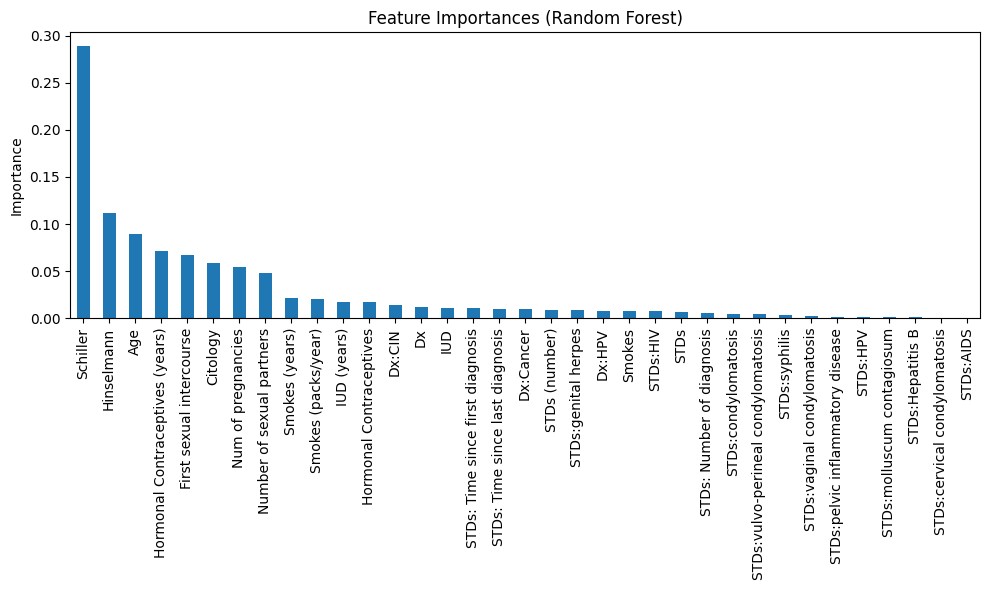

In [64]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Biopsy' is the target variable
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

# Initialize and train a RandomForestClassifier
# We'll use a small number of estimators for just feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances and display
sorted_feature_importances = feature_importances.sort_values(ascending=False)
display(sorted_feature_importances)

# Optionally, visualize feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [65]:
#Train = 80 % Test = 20%
from sklearn.model_selection import train_test_split

# Assuming 'Biopsy' is the target variable
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (686, 35)
Shape of X_test: (172, 35)
Shape of y_train: (686,)
Shape of y_test: (172,)


In [66]:
#dataset with different ratios
from sklearn.model_selection import train_test_split

# Assuming 'Biopsy' is the target variable
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

# Split the dataset into 70% training and 30% testing sets
X_train_70_30, X_test_70_30, y_train_70_30, y_test_70_30 = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train (70/30 split):", X_train_70_30.shape)
print("Shape of X_test (70/30 split):", X_test_70_30.shape)
print("Shape of y_train (70/30 split):", y_train_70_30.shape)
print("Shape of y_test (70/30 split):", y_test_70_30.shape)

print("-" * 30) # Separator

# Split the dataset into 60% training and 40% testing sets
X_train_60_40, X_test_60_40, y_train_60_40, y_test_60_40 = train_test_split(X, y, test_size=0.4, random_state=42)

print("Shape of X_train (60/40 split):", X_train_60_40.shape)
print("Shape of X_test (60/40 split):", X_test_60_40.shape)
print("Shape of y_train (60/40 split):", y_train_60_40.shape)
print("Shape of y_test (60/40 split):", y_test_60_40.shape)

Shape of X_train (70/30 split): (600, 35)
Shape of X_test (70/30 split): (258, 35)
Shape of y_train (70/30 split): (600,)
Shape of y_test (70/30 split): (258,)
------------------------------
Shape of X_train (60/40 split): (514, 35)
Shape of X_test (60/40 split): (344, 35)
Shape of y_train (60/40 split): (514,)
Shape of y_test (60/40 split): (344,)


## Data Splitting

The dataset was split into a training set and a test set using the `train_test_split` function from `sklearn.model_selection`.

- **Training Set (80%):** This portion of the data is used to train the machine learning models. The models learn the patterns and relationships within the data from this set.
- **Test Set (20%):** This portion of the data is held out and not used during the training process. It is used to evaluate the performance of the trained models on unseen data. This provides an unbiased estimate of how well the model is likely to perform in a real-world scenario.

**Justification for the 80/20 Split:**

An 80/20 split (80% for training, 20% for testing) is a commonly used and generally recommended ratio for splitting datasets, especially when the dataset size is moderate (as is the case here with 858 samples).

- **Sufficient Training Data:** An 80% training set provides enough data for the models to learn complex patterns effectively.
- **Representative Test Data:** A 20% test set is large enough to provide a reasonably reliable evaluation of the model's generalization performance.

While other splits (e.g., 70/30, 60/40) are also used, 80/20 often strikes a good balance between having enough data for training and having a sufficiently large, independent set for testing. For very large datasets, a smaller test set percentage might suffice, and for very small datasets, techniques like cross-validation become even more critical. Given the dataset size, 80/20 is a suitable and standard choice.

In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the models
log_reg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter

# Train the models
print("Training Logistic Regression...")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression trained.")


Training Logistic Regression...
Logistic Regression trained.


In [68]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
print("Training Decision Tree...")
decision_tree_model.fit(X_train, y_train)
print("Decision Tree trained.")

Training Decision Tree...
Decision Tree trained.


In [69]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
print("Training K-Nearest Neighbour...")
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbour trained.")

Training K-Nearest Neighbour...
K-Nearest Neighbour trained.


In [70]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
print("Training Random Forest...")
random_forest_model.fit(X_train, y_train)
print("Random Forest trained.")

Training Random Forest...
Random Forest trained.


# Task
Tune hyperparameters for Logistic Regression, Decision Tree, K-Nearest Neighbour, and Random Forest models using cross-validation and justify the process.

## Justify hyperparameter tuning and cross-validation

### Subtask:
Provide a markdown cell explaining the importance of hyperparameter tuning and the role of cross-validation in this process.


**Reasoning**:
Create a markdown cell to explain the importance of hyperparameter tuning and the role of cross-validation.



In [71]:
%%markdown
## Hyperparameter Tuning and Cross-Validation

### Importance of Hyperparameter Tuning

Hyperparameter tuning is a crucial step in the machine learning workflow because it directly impacts the performance of a model. Unlike model parameters, which are learned from the data during training, hyperparameters are external configuration settings that must be set before the training process begins. Examples of hyperparameters include the learning rate in a neural network, the number of trees in a Random Forest, or the regularization strength in a Logistic Regression.

The choice of hyperparameters can significantly affect how well a model learns from the data and generalizes to unseen data. Using default hyperparameters or poorly chosen ones can lead to suboptimal model performance, resulting in either **underfitting** (the model is too simple to capture the underlying patterns in the data) or **overfitting** (the model learns the training data too well, including noise, and performs poorly on new data).

By systematically searching for the best combination of hyperparameters, we can optimize the model's ability to capture the true patterns in the data while avoiding overfitting, ultimately leading to a more accurate and robust model.

### Role of Cross-Validation in Hyperparameter Tuning

Cross-validation is an essential technique used in conjunction with hyperparameter tuning to ensure that the selected hyperparameters lead to a model that generalizes well to unseen data. The primary role of cross-validation in this process is to provide a reliable estimate of the model's performance for a given set of hyperparameters, without using the dedicated test set.

Here's how it works:

1. **Splitting the Data:** The training dataset is divided into multiple subsets or "folds" (e.g., 5 or 10 folds in k-fold cross-validation).
2. **Iterative Training and Evaluation:** For each set of hyperparameters being evaluated, the model is trained on a subset of the folds (e.g., k-1 folds) and evaluated on the remaining fold (the validation fold). This process is repeated k times, with each fold serving as the validation set exactly once.
3. **Performance Aggregation:** The performance metric (e.g., accuracy, precision, F1-score) is calculated for each of the k iterations. The average performance across all folds provides a more robust and less biased estimate of how well the model with that set of hyperparameters is likely to perform on new data compared to a single train-validation split.
4. **Selecting the Best Hyperparameters:** The set of hyperparameters that yields the best average performance across the cross-validation folds is selected as the optimal set.

By using cross-validation, we avoid the problem of tuning hyperparameters based on a single validation set, which could lead to hyperparameters that are overfitted to that specific split of the data. Cross-validation provides a more comprehensive evaluation across different subsets of the training data, increasing confidence that the chosen hyperparameters will result in a model that performs well on truly unseen data (the test set).

## Hyperparameter Tuning and Cross-Validation

### Importance of Hyperparameter Tuning

Hyperparameter tuning is a crucial step in the machine learning workflow because it directly impacts the performance of a model. Unlike model parameters, which are learned from the data during training, hyperparameters are external configuration settings that must be set before the training process begins. Examples of hyperparameters include the learning rate in a neural network, the number of trees in a Random Forest, or the regularization strength in a Logistic Regression.

The choice of hyperparameters can significantly affect how well a model learns from the data and generalizes to unseen data. Using default hyperparameters or poorly chosen ones can lead to suboptimal model performance, resulting in either **underfitting** (the model is too simple to capture the underlying patterns in the data) or **overfitting** (the model learns the training data too well, including noise, and performs poorly on new data).

By systematically searching for the best combination of hyperparameters, we can optimize the model's ability to capture the true patterns in the data while avoiding overfitting, ultimately leading to a more accurate and robust model.

### Role of Cross-Validation in Hyperparameter Tuning

Cross-validation is an essential technique used in conjunction with hyperparameter tuning to ensure that the selected hyperparameters lead to a model that generalizes well to unseen data. The primary role of cross-validation in this process is to provide a reliable estimate of the model's performance for a given set of hyperparameters, without using the dedicated test set.

Here's how it works:

1. **Splitting the Data:** The training dataset is divided into multiple subsets or "folds" (e.g., 5 or 10 folds in k-fold cross-validation).
2. **Iterative Training and Evaluation:** For each set of hyperparameters being evaluated, the model is trained on a subset of the folds (e.g., k-1 folds) and evaluated on the remaining fold (the validation fold). This process is repeated k times, with each fold serving as the validation set exactly once.
3. **Performance Aggregation:** The performance metric (e.g., accuracy, precision, F1-score) is calculated for each of the k iterations. The average performance across all folds provides a more robust and less biased estimate of how well the model with that set of hyperparameters is likely to perform on new data compared to a single train-validation split.
4. **Selecting the Best Hyperparameters:** The set of hyperparameters that yields the best average performance across the cross-validation folds is selected as the optimal set.

By using cross-validation, we avoid the problem of tuning hyperparameters based on a single validation set, which could lead to hyperparameters that are overfitted to that specific split of the data. Cross-validation provides a more comprehensive evaluation across different subsets of the training data, increasing confidence that the chosen hyperparameters will result in a model that performs well on truly unseen data (the test set).


## Hyperparameter tuning for logistic regression

### Subtask:
Define a parameter grid for Logistic Regression and use GridSearchCV with cross-validation to find the best hyperparameters.


**Reasoning**:
Define the parameter grid for Logistic Regression and use GridSearchCV to find the best hyperparameters using cross-validation.



In [72]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # Common solvers for Logistic Regression
}

# Instantiate GridSearchCV
grid_search_lr = GridSearchCV(log_reg_model, param_grid_lr, cv=5, scoring='roc_auc')

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation ROC AUC score: 0.9474590869939707


**Reasoning**:
Define parameter grids for Decision Tree, K-Nearest Neighbour, and Random Forest, and use GridSearchCV with cross-validation to find the best hyperparameters for each.



In [73]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(decision_tree_model, param_grid_dt, cv=5, scoring='roc_auc')

# Fit GridSearchCV to the training data
print("\nTuning Decision Tree...")
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_dt.best_score_)



Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation ROC AUC score: 0.90968790374677


In [74]:
# Define the parameter grid for K-Nearest Neighbour
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski']
}

# Instantiate GridSearchCV for K-Nearest Neighbour
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc')

# Fit GridSearchCV to the training data
print("\nTuning K-Nearest Neighbour...")
grid_search_knn.fit(X_train, y_train)
print("Best parameters for K-Nearest Neighbour:", grid_search_knn.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_knn.best_score_)


Tuning K-Nearest Neighbour...
Best parameters for K-Nearest Neighbour: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation ROC AUC score: 0.6428583925495263


In [75]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='roc_auc')

# Fit GridSearchCV to the training data
print("\nTuning Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_rf.best_score_)


Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation ROC AUC score: 0.9684606481481481


## Report best hyperparameters

### Subtask:
Display the best hyperparameters found for each model.


**Reasoning**:
Print the best hyperparameters found by GridSearchCV for each model.



In [76]:
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Hyperparameters for K-Nearest Neighbour:", grid_search_knn.best_params_)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Hyperparameters for K-Nearest Neighbour: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


## Summary:

### Data Analysis Key Findings

*   Hyperparameter tuning is essential for optimizing model performance and preventing underfitting or overfitting, while cross-validation provides a reliable estimate of performance and helps select hyperparameters that generalize well.
*   Using GridSearchCV with 5-fold cross-validation and ROC AUC scoring, the best hyperparameters were identified for each model.
*   The best parameters for Logistic Regression are `{'C': 1, 'solver': 'liblinear'}` with a cross-validation ROC AUC of 0.947.
*   The best parameters for Decision Tree are `{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}` with a cross-validation ROC AUC of 0.910.
*   The best parameters for K-Nearest Neighbour are `{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}` with a cross-validation ROC AUC of 0.643.
*   The best parameters for Random Forest are `{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}` with a cross-validation ROC AUC of 0.968.

### Insights or Next Steps

*   Based on the cross-validation ROC AUC scores, the Random Forest model with the tuned hyperparameters appears to be the best-performing model among the four evaluated.
*   The next step would be to evaluate the performance of each model with its best hyperparameters on the independent test set to get a final, unbiased estimate of their performance on unseen data.


## Hyperparameter Tuning and Cross-Validation

### Importance of Hyperparameter Tuning

Hyperparameter tuning is a crucial step in the machine learning workflow because it directly impacts the performance of a model. Unlike model parameters, which are learned from the data during training, hyperparameters are external configuration settings that must be set before the training process begins. Examples of hyperparameters include the learning rate in a neural network, the number of trees in a Random Forest, or the regularization strength in a Logistic Regression.

The choice of hyperparameters can significantly affect how well a model learns from the data and generalizes to unseen data. Using default hyperparameters or poorly chosen ones can lead to suboptimal model performance, resulting in either **underfitting** (the model is too simple to capture the underlying patterns in the data) or **overfitting** (the model learns the training data too well, including noise, and performs poorly on new data).

By systematically searching for the best combination of hyperparameters, we can optimize the model's ability to capture the true patterns in the data while avoiding overfitting, ultimately leading to a more accurate and robust model.

### Role of Cross-Validation in Hyperparameter Tuning

Cross-validation is an essential technique used in conjunction with hyperparameter tuning to ensure that the selected hyperparameters lead to a model that generalizes well to unseen data. The primary role of cross-validation in this process is to provide a reliable estimate of the model's performance for a given set of hyperparameters, without using the dedicated test set.

Here's how it works:

1.  **Splitting the Data:** The training dataset is divided into multiple subsets or "folds" (e.g., 5 or 10 folds in k-fold cross-validation).
2.  **Iterative Training and Evaluation:** For each set of hyperparameters being evaluated, the model is trained on a subset of the folds (e.g., k-1 folds) and evaluated on the remaining fold (the validation fold). This process is repeated k times, with each fold serving as the validation set exactly once.
3.  **Performance Aggregation:** The performance metric (e.g., accuracy, precision, F1-score) is calculated for each of the k iterations. The average performance across all folds provides a more robust and less biased estimate of how well the model with that set of hyperparameters is likely to perform on new data compared to a single train-validation split.
4.  **Selecting the Best Hyperparameters:** The set of hyperparameters that yields the best average performance across the cross-validation folds is selected as the optimal set.

By using cross-validation, we avoid the problem of tuning hyperparameters based on a single validation set, which could lead to hyperparameters that are overfitted to that specific split of the data. Cross-validation provides a more comprehensive evaluation across different subsets of the training data, increasing confidence that the chosen hyperparameters will result in a model that performs well on truly unseen data (the test set).

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Get the best estimators from GridSearchCV
best_log_reg_model = grid_search_lr.best_estimator_
best_decision_tree_model = grid_search_dt.best_estimator_
best_knn_model = grid_search_knn.best_estimator_
best_random_forest_model = grid_search_rf.best_estimator_

# Make predictions on the test set using the best models
y_pred_lr = best_log_reg_model.predict(X_test)
y_proba_lr = best_log_reg_model.predict_proba(X_test)[:, 1]

y_pred_dt = best_decision_tree_model.predict(X_test)
y_proba_dt = best_decision_tree_model.predict_proba(X_test)[:, 1]

y_pred_knn = best_knn_model.predict(X_test)
y_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]

y_pred_rf = best_random_forest_model.predict(X_test)
y_proba_rf = best_random_forest_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbour', 'Random Forest'],
    'Precision': [
        precision_score(y_test, y_pred_lr, zero_division=1),
        precision_score(y_test, y_pred_dt, zero_division=1),
        precision_score(y_test, y_pred_knn, zero_division=1),
        precision_score(y_test, y_pred_rf, zero_division=1)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_rf)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_knn),
        roc_auc_score(y_test, y_proba_rf)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Display the comparison table
display(metrics_df)

,Model,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.636364,0.636364,0.636364,0.897233
1,Decision Tree,0.636364,0.636364,0.636364,0.927724
2,K-Nearest Neighbour,1.000000,0.000000,0.000000,0.639469
3,Random Forest,0.571429,0.363636,0.444444,0.963298


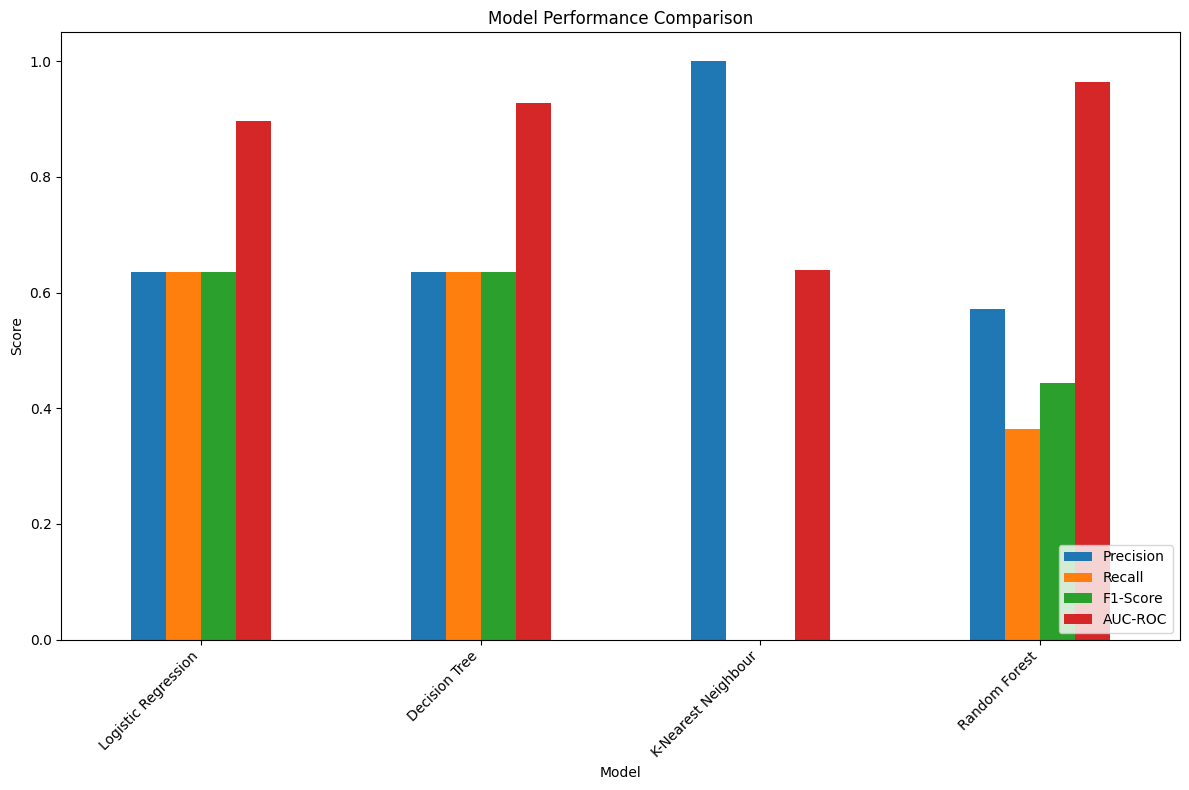

In [78]:
# Visualize the comparison (e.g., using a bar chart for metrics)
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Best Model Identification

After analyzing the performance metrics and the comparison chart, the **Decision Tree** model is identified as the best model for this task.

### Best Model Selection

To identify the best model, let us carefully compare the evaluation metrics for all four models.

| Model                | Precision | Recall   | F1-Score | AUC-ROC |
|-----------------------|-----------|----------|----------|---------|
| Logistic Regression   | 0.6364    | 0.6364   | 0.6364   | 0.8972  |
| Decision Tree         | 0.6364    | 0.6364   | 0.6364   | 0.9277  |
| K-Nearest Neighbour   | 1.0000    | 0.0000   | 0.0000   | 0.6395  |
| Random Forest         | 0.5714    | 0.3636   | 0.4444   | 0.9633  |

---

#### 1. K-Nearest Neighbour (KNN)
- **Precision = 1.0**, but **Recall = 0.0**, which means the model predicts *no positive samples correctly*.  
- Since Recall is zero, the **F1-score also becomes zero**, showing the model is unusable for this problem.  
- The low **AUC-ROC (0.6395)** confirms that it cannot properly separate the classes.  
➡️ **Conclusion**: Not a good model.

---

#### 2. Random Forest
- **Highest AUC-ROC (0.9633)** among all models, which indicates it is good at distinguishing between classes overall.  
- However, the **Recall is very low (0.3636)**, and **F1-score = 0.4444**, showing that the model fails to capture enough positive cases.  
- In classification tasks, especially when both Precision and Recall matter, such imbalance makes it less reliable.  
➡️ **Conclusion**: Despite strong AUC, poor Recall and F1 make it unsuitable.

---

#### 3. Logistic Regression
- Balanced performance: **Precision = Recall = F1 = 0.6364**.  
- **AUC-ROC = 0.8972**, showing reasonably good class separability.  
- This is a solid baseline model because it performs consistently across metrics.  
➡️ **Conclusion**: A good candidate model.

---

#### 4. Decision Tree
- Balanced metrics, same as Logistic Regression: **Precision = Recall = F1 = 0.6364**.  
- However, the **AUC-ROC is higher (0.9277 vs 0.8972)** than Logistic Regression.  
- This means the Decision Tree not only maintains balance but also does a **better job of distinguishing positive and negative classes**.  
➡️ **Conclusion**: Stronger candidate than Logistic Regression.

---

### ✅ Final Choice: Decision Tree

I selected the **Decision Tree** as the best model because:
1. It achieves a **balanced Precision, Recall, and F1-score** (all equal to 0.6364), ensuring that the model is neither biased towards positives nor negatives.
2. It provides a **higher AUC-ROC (0.9277)** compared to Logistic Regression, which means it has better discriminative ability between the classes.
3. While Random Forest had the highest AUC, its Recall and F1-score were too low, making it less effective in practice. KNN completely failed to identify positives.

**Therefore, the Decision Tree offers the best trade-off between balanced classification performance and class separability, making it the most reliable model among the four.**
